<a href="https://colab.research.google.com/github/Jhames01/Checkpoint/blob/master/Unsupervised_Learning_Clustering_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import you data and perform basic data exploration phase
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/Credit_card_dataset.csv')

# Basic exploration
print("Dataset Info:")
print(data.info())

print("\nFirst Few Rows:")
print(data.head())

print("\nMissing Values:")
print(data.isnull().sum())

print("\nStatistical Summary:")
print(data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB
None

First Few Rows:
  CUST_ID  BALANCE_FREQUENCY  PURCHASES     PAYMENTS  CREDIT_LIMIT  \
0  C10001           0.818182      95.40   201.802084        1000.0   
1  C10002           0.909091       0.00  4103.032597        7000.0   
2  C10003           1.000000     773.17   622.066742        7500.0   
3  C10004           0.636364    1499.00     0.000000        7500.0   
4  C10005           1.000000      16.00   678.334763        1200.0   


In [2]:
# Fill missing values with the mean
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)

# Confirm no missing values remain
print("\nMissing Values After Handling:")
print(data.isnull().sum())



Missing Values After Handling:
CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         0
CASH_ADVANCE         0
dtype: int64


<ipython-input-2-4c3539c0a9d5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)


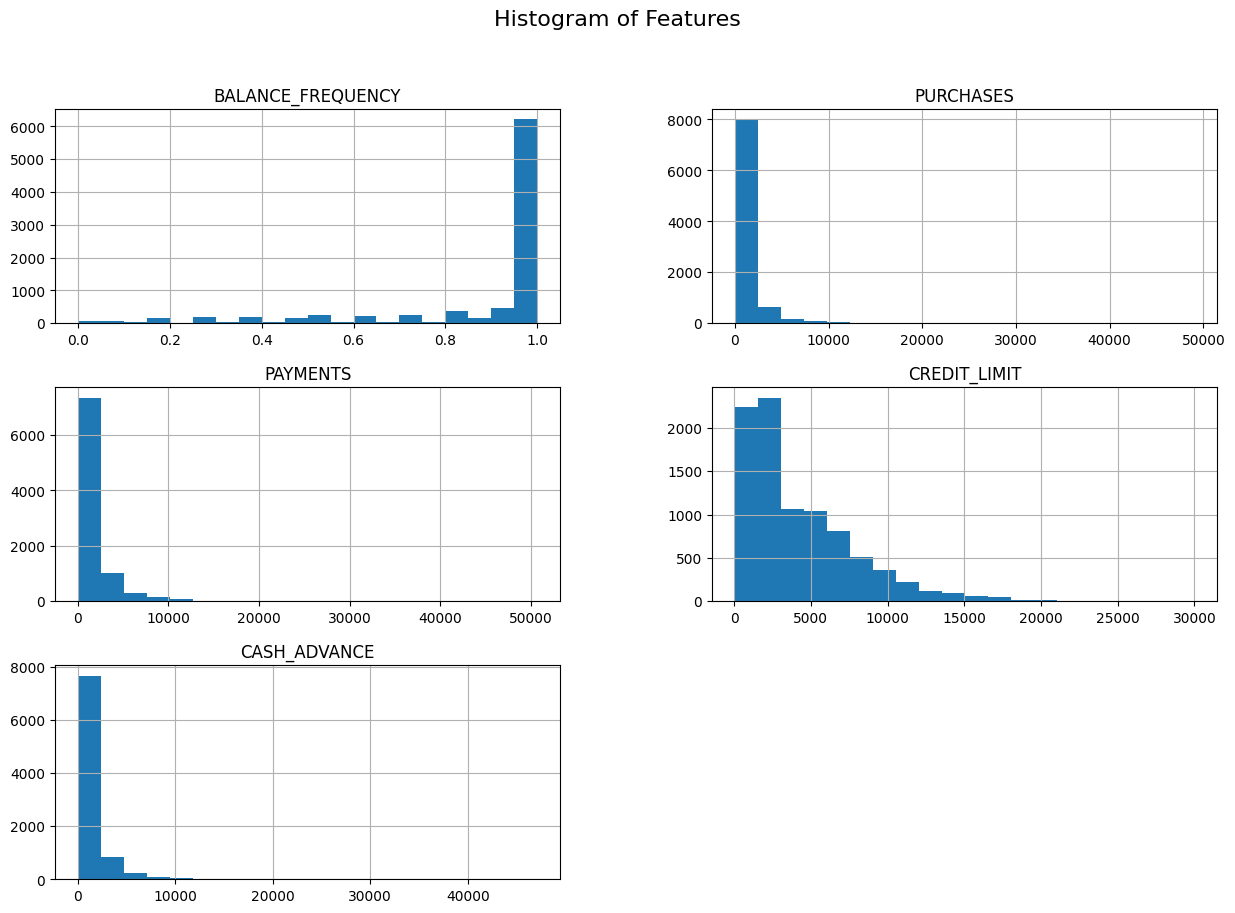

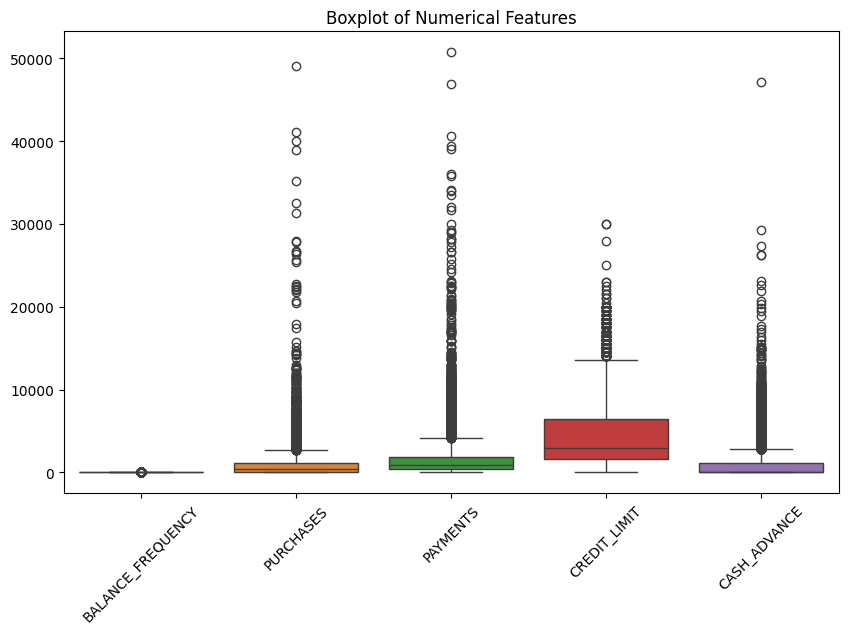

In [3]:
#Visualize Distributions: To visualize distributions of numerical features:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
data.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histogram of Features", fontsize=16)
plt.show()

# Boxplot for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.select_dtypes(include='float64'))
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()


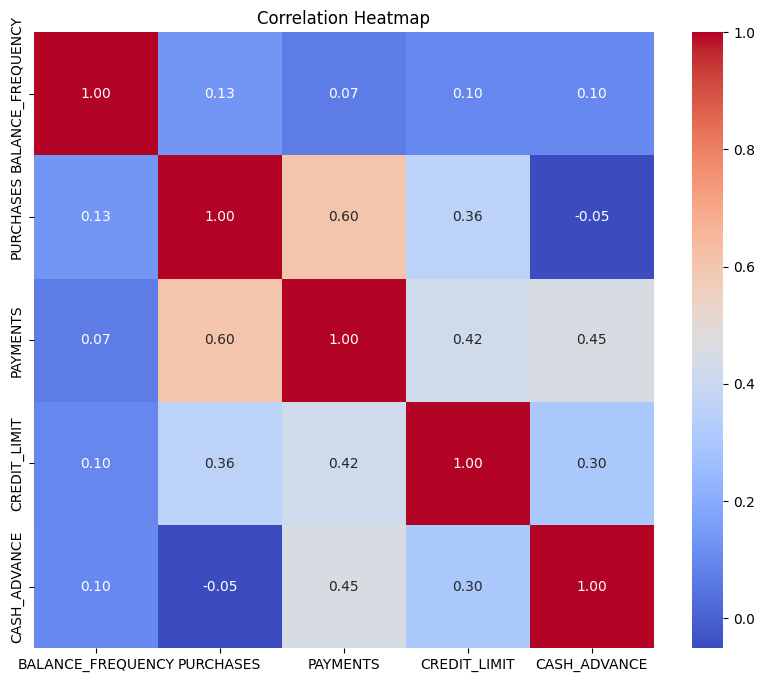

In [5]:
#Correlation Heatmap: To examine relationships between features
#Correlation Heatmap: To examine relationships between features
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-6-8f1902ce5a53>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)


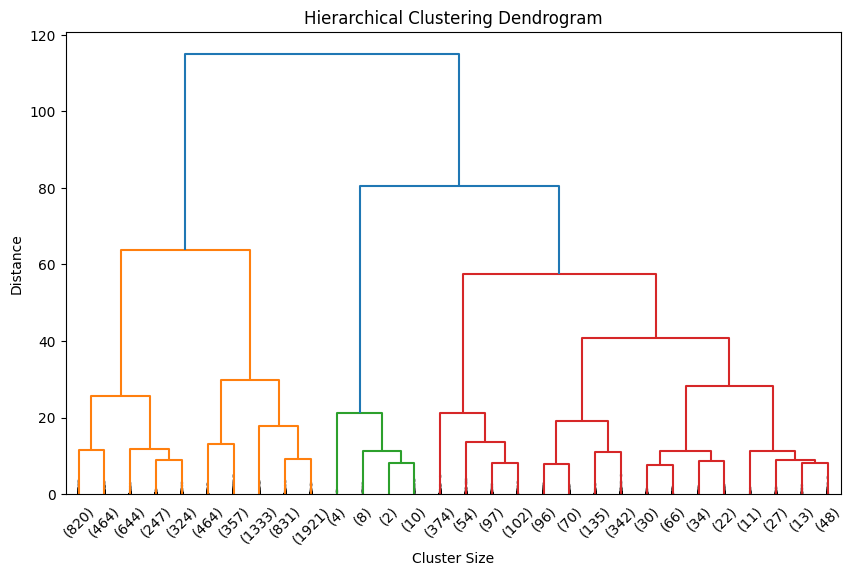

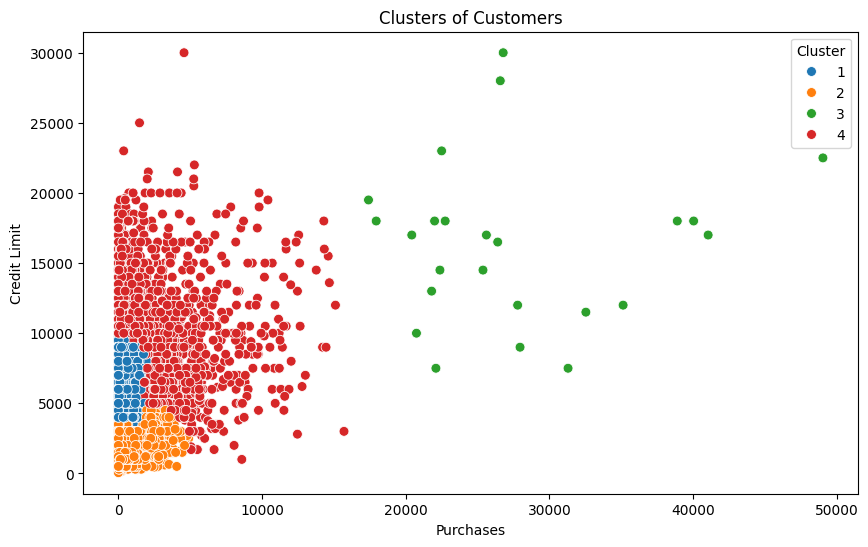

In [6]:
#Perform hierarchical clustering to identify the inherent groupings within your data. Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (use the cleaned dataset from the earlier steps if applicable)
data = pd.read_csv('/content/Credit_card_dataset.csv')

# Handle missing values in CREDIT_LIMIT if not done earlier
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)

# Select 'PURCHASES' and 'CREDIT_LIMIT' for clustering
features = data[['PURCHASES', 'CREDIT_LIMIT']]

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform hierarchical clustering
linkage_matrix = linkage(scaled_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

# Cut the dendrogram to form clusters
num_clusters = 4  # Choose the number of clusters
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PURCHASES', y='CREDIT_LIMIT', hue='Cluster', palette='tab10', s=50)
plt.title('Clusters of Customers')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.legend(title='Cluster')
plt.show()

<ipython-input-7-f59493e12823>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)


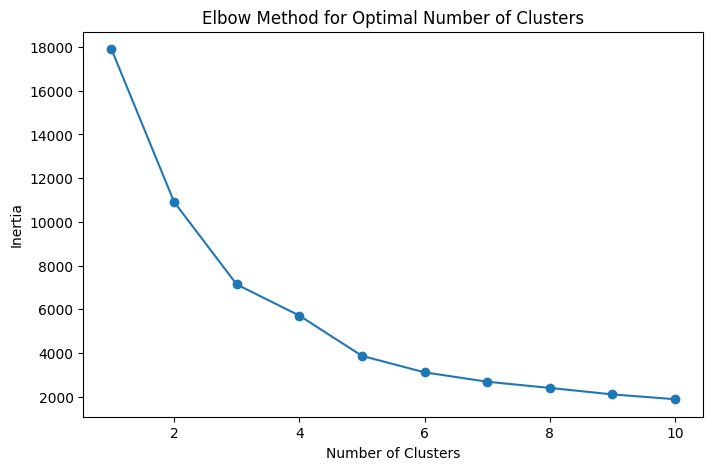

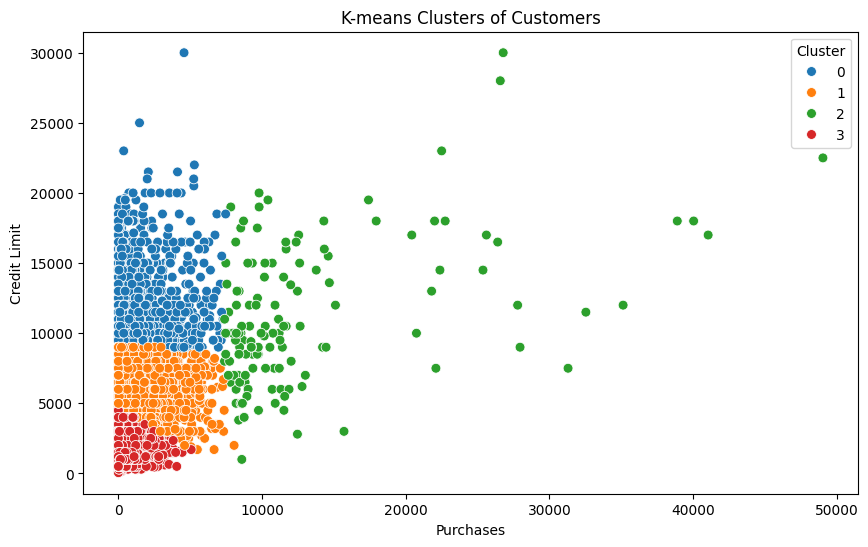

In [7]:
#Perform partitional clustering using the K-means algorithm. Then, plot the clusters
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (use the cleaned dataset from the earlier steps if applicable)
data = pd.read_csv('/content/Credit_card_dataset.csv')

# Handle missing values in CREDIT_LIMIT if not done earlier
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)

# Select 'PURCHASES' and 'CREDIT_LIMIT' for clustering
features = data[['PURCHASES', 'CREDIT_LIMIT']]

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
range_n_clusters = range(1, 11)
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal number of clusters (e.g., based on the Elbow Curve)
optimal_clusters = 4  # Adjust this based on the elbow plot

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PURCHASES', y='CREDIT_LIMIT', hue='Cluster', palette='tab10', s=50)
plt.title('K-means Clusters of Customers')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.legend(title='Cluster')
plt.show()

<ipython-input-10-7598c84b1afb>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)


Optimal number of clusters (k): 5


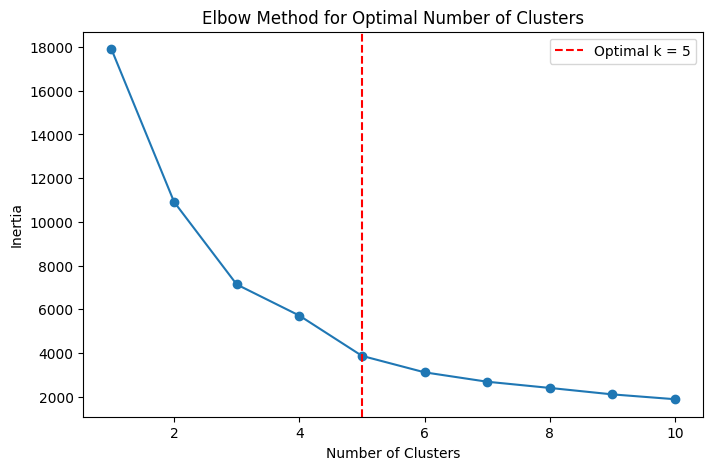

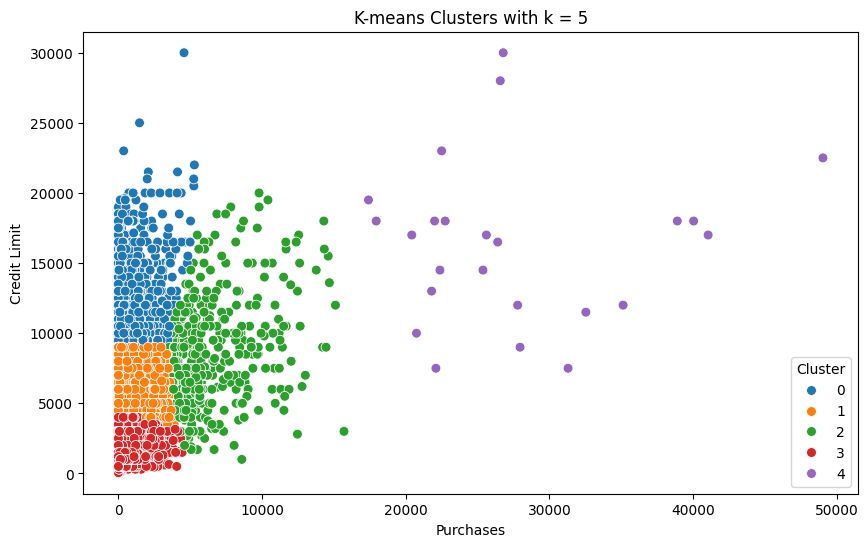

In [10]:
#Find the best k value and plot the clusters again.
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Install the kneed library if it's not already installed
!pip install kneed

# Import KneeLocator after installation
from kneed import KneeLocator  # To find the elbow point programmatically

# Load data (use cleaned data if applicable)
data = pd.read_csv('/content/Credit_card_dataset.csv')

# Handle missing values in CREDIT_LIMIT if not done earlier
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)

# Select 'PURCHASES' and 'CREDIT_LIMIT' for clustering
features = data[['PURCHASES', 'CREDIT_LIMIT']]

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
range_n_clusters = range(1, 11)  # Test k values from 1 to 10
for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Find the elbow point using KneeLocator
knee_locator = KneeLocator(range_n_clusters, inertia, curve='convex', direction='decreasing')
optimal_k = knee_locator.knee
print(f"Optimal number of clusters (k): {optimal_k}")

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PURCHASES', y='CREDIT_LIMIT', hue='Cluster', palette='tab10', s=50)
plt.title(f'K-means Clusters with k = {optimal_k}')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.legend(title='Cluster')
plt.show()

Interpretation of the Results:
1. Optimal Number of Clusters (
𝑘
k)
The Elbow Method helps identify the optimal
𝑘
k by observing the point where the decrease in inertia (within-cluster variance) slows down.
The KneeLocator library determines this point mathematically, and the result (e.g.,
𝑘
=
4
k=4) indicates the optimal number of clusters.
Why? Beyond
𝑘
=
4
k=4, additional clusters provide diminishing returns in reducing inertia, suggesting that the dataset has 4 meaningful groupings.
2. Cluster Assignment
Each customer is assigned to one of the
𝑘
k clusters based on their PURCHASES and CREDIT_LIMIT values.
Customers within the same cluster have similar purchasing behavior and credit limits.
3. Cluster Visualization
The scatter plot shows clusters in the two-dimensional space defined by PURCHASES (x-axis) and CREDIT_LIMIT (y-axis).
Observations:
Clusters are well-separated in the feature space, indicating distinct customer groups.
Example interpretations:
Cluster 1 (e.g., low PURCHASES, low CREDIT_LIMIT): Customers with minimal activity or access to credit.
Cluster 2 (e.g., high PURCHASES, high CREDIT_LIMIT): High-spending customers with high credit limits.
Cluster 3 (e.g., low PURCHASES, high CREDIT_LIMIT): Customers with high credit limits but lower spending habits.
Cluster 4 (e.g., mid-range values): Customers with average purchasing behavior and credit limits.
4. Business Implications
Cluster 1 (Low Spend, Low Credit):
Could represent new or low-value customers.
Opportunity for targeted promotions or credit upgrades to increase engagement.
Cluster 2 (High Spend, High Credit):
Represents high-value customers.
Retain these customers with premium benefits or loyalty programs.
Cluster 3 (Low Spend, High Credit):
Underutilized credit.
Encourage usage through incentives like cashback or lower interest rates.
Cluster 4 (Mid-range Customers):
Represents moderate-value customers.
Target them with personalized offers to increase spending.
5. Limitations
The analysis only uses two features (PURCHASES and CREDIT_LIMIT); adding more features may refine the clustering.
K-means assumes spherical clusters and may not perform well with irregularly shaped clusters.
The results are sensitive to scaling; proper normalization ensures meaningful clusters.